In [ ]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load data
train_df = pd.read_csv('/kaggle/input/mse-2-ai-201-b-aiml-a/train.csv')
test_df  = pd.read_csv('/kaggle/input/mse-2-ai-201-b-aiml-a/test.csv')

train_df.info()
train_df.head()


# Drop id column only


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               1854 non-null   float64
 1   Perimeter          1749 non-null   float64
 2   Major_Axis_Length  1776 non-null   float64
 3   Minor_Axis_Length  1791 non-null   float64
 4   Convex_Area        1874 non-null   float64
 5   Equiv_Diameter     1891 non-null   float64
 6   Eccentricity       1915 non-null   float64
 7   Solidity           1754 non-null   float64
 8   Extent             1800 non-null   float64
 9   Roundness          1772 non-null   float64
 10  Aspect_Ration      1927 non-null   float64
 11  Compactness        1738 non-null   float64
 12  Class              1752 non-null   object 
dtypes: float64(12), object(1)
memory usage: 205.7+ KB


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,79737.0,1165.818,483.7234,210.5411,80498.0,318.6288,0.9003,0.9905,0.7461,0.7372,2.2975,0.6587,A
1,81893.0,NaN,441.5179,237.5255,83087.0,322.9077,0.8430,NaN,0.7181,0.8098,1.8588,0.7314,B
2,82468.0,NaN,452.2654,232.5943,83212.0,324.0394,0.8576,0.9911,0.6277,0.8045,1.9444,0.7165,B
3,99270.0,1245.963,495.6917,255.7247,100359.0,355.5200,0.8567,0.9891,0.6966,0.8036,1.9384,NaN,A
4,70388.0,1044.665,426.7972,211.0762,71013.0,299.3673,0.8691,0.9912,0.7189,0.8105,2.0220,0.7014,B


In [ ]:
test_df.head()

,id,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,1,65457,1025.784,421.3851,199.1137,66401,288.6909,0.8813,0.9858,0.7277,0.7817,2.1163,0.6851
1,2,73550,1076.886,433.8194,216.6902,74260,306.0176,0.8663,0.9904,0.7065,0.7970,2.0020,0.7054
2,3,80519,1105.276,435.6902,236.2395,81250,320.1874,0.8402,0.9910,0.7417,0.8283,1.8443,0.7349
3,4,93323,1244.527,519.3040,229.4401,94506,344.7064,0.8971,0.9875,0.7532,0.7572,2.2634,0.6638
4,5,83005,1234.751,539.6816,196.7117,83725,325.0927,0.9312,0.9914,0.5750,0.6842,2.7435,0.6024


In [ ]:
#train_df.drop(['id'], axis=1, inplace=True)


In [ ]:
# -------- SIMPLE NaN FIX --------
train_df = train_df.dropna()     # remove missing rows
test_df  = test_df.fillna(0)     # fill missing test values
# --------------------------------

In [ ]:
#Label Encoding target if needed
# le = LabelEncoder()
# train_df['Class'] = le.fit_transform(train_df['Class'])   # C,CL,D → 0,1,2


#If a numeric column represents:

#categories

#levels

#classes

#stages

#groups

#labels encoded as numbers

#👉 Treat it as CATEGORICAL.


In [ ]:
#cat_cols = ['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema','Stage']
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Class')   # target
train_df = pd.get_dummies(train_df, columns=cat_cols, drop_first=True, dtype=int)

In [ ]:
le = LabelEncoder()
# train_df['Class'] = le.fit_transform(train_df['Class'])   # C,CL,D → 0,1,2


In [ ]:
# Outlier removal
#Area	Perimeter	Major_Axis_Length	Minor_Axis_Length	Convex_Area	Equiv_Diameter	Eccentricity	Solidity	Extent	Roundness	Aspect_Ration	Compactness
category_col = 'Class'
numeric_cols = ['Area','Perimeter','Major_Axis_Length','Minor_Axis_Length','Convex_Area','Equiv_Diameter',
                'Eccentricity','Solidity','Roundness','Aspect_Ration','Compactness']

In [ ]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_clean = remove_outliers_iqr(train_df, numeric_cols)
print(f"Before: {train_df.shape[0]} rows, After: {df_clean.shape[0]} rows")

Before: 476 rows, After: 447 rows


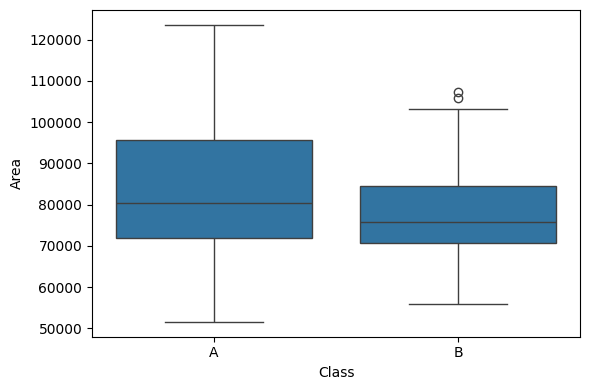

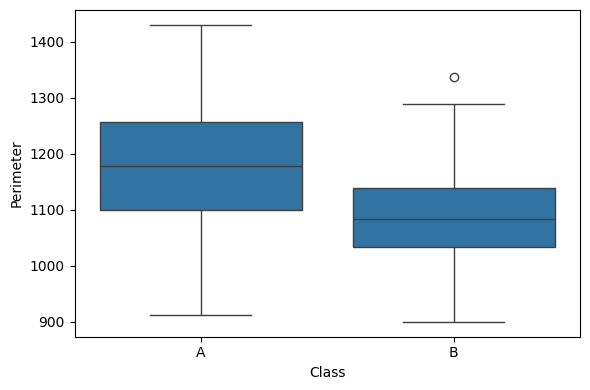

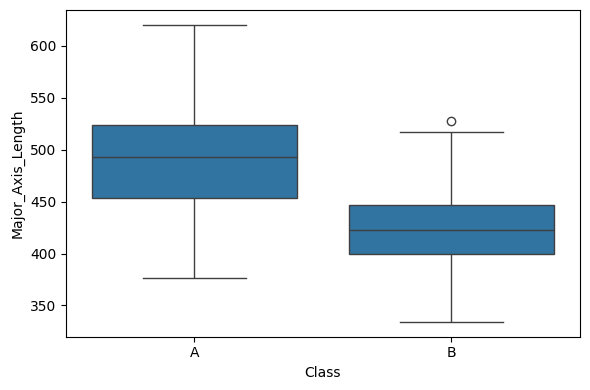

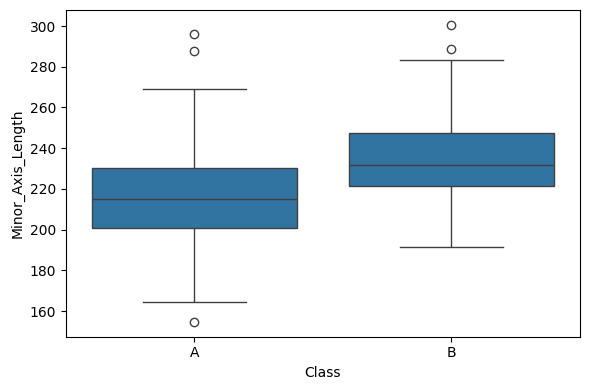

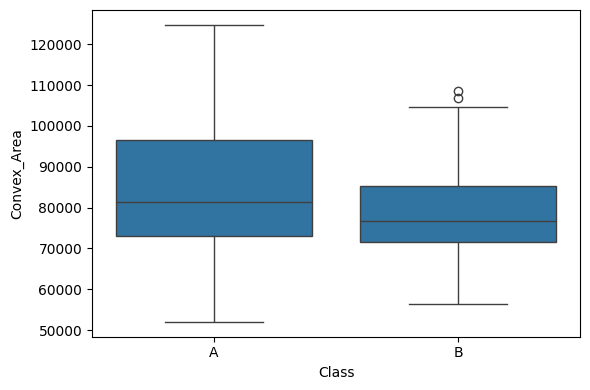

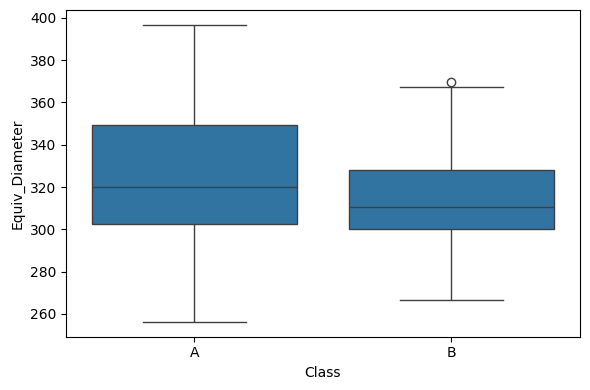

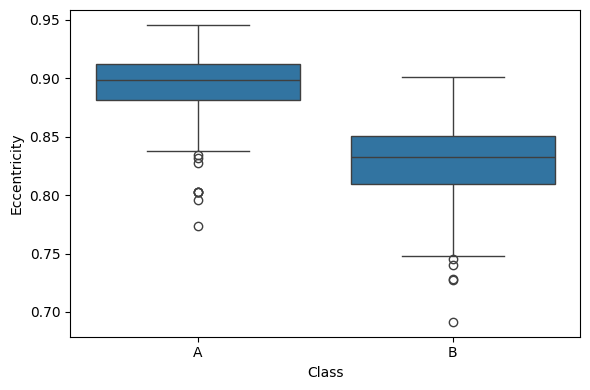

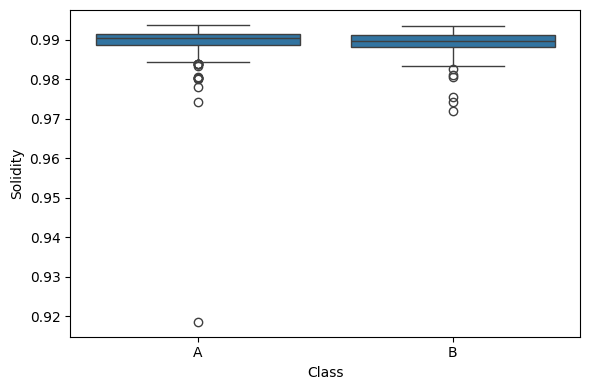

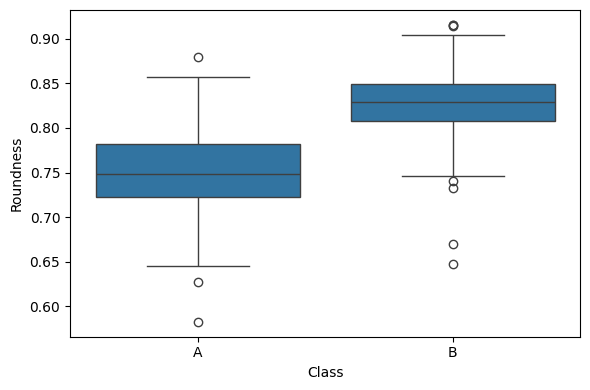

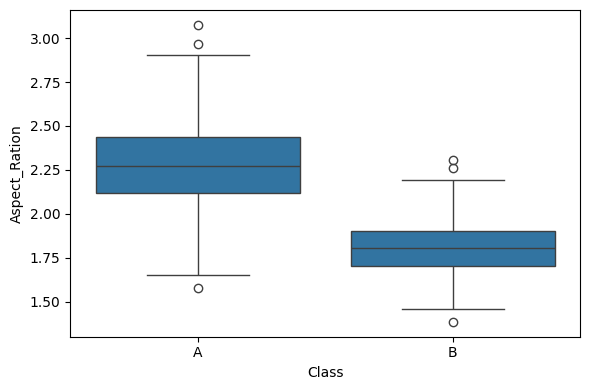

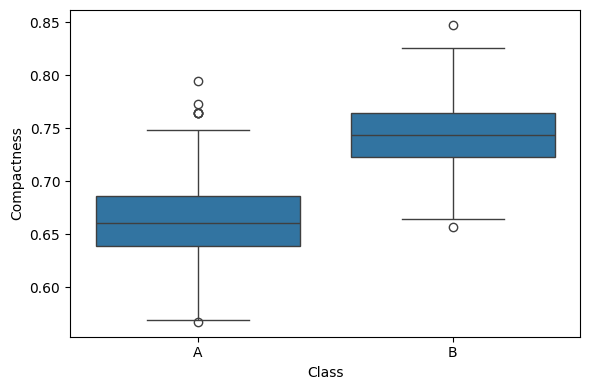

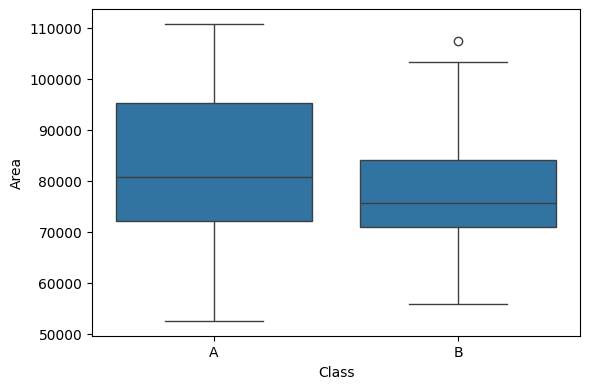

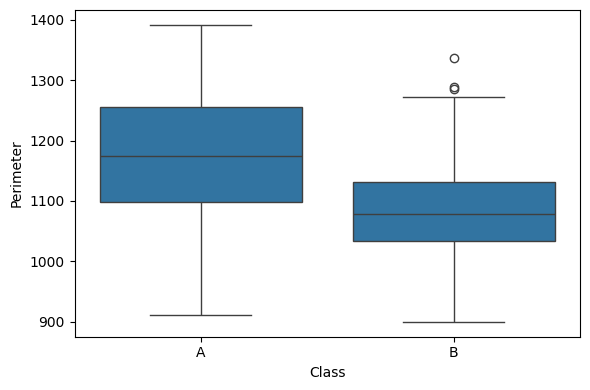

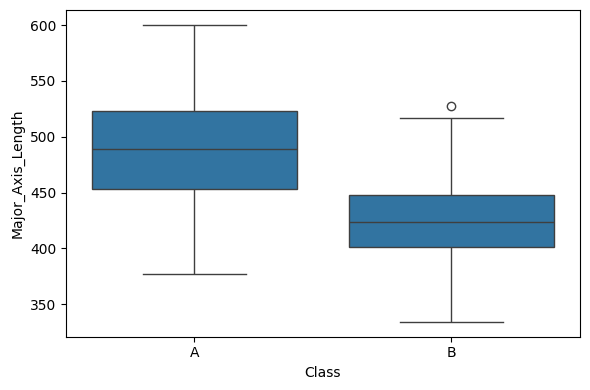

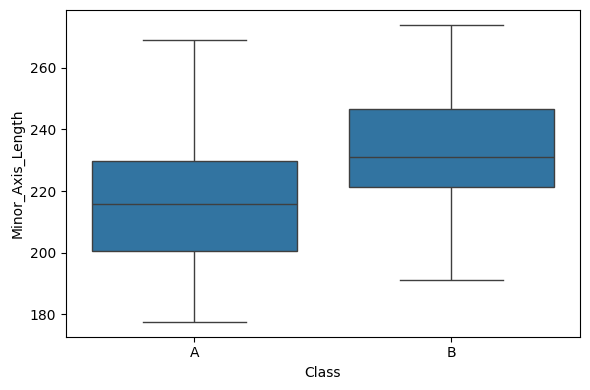

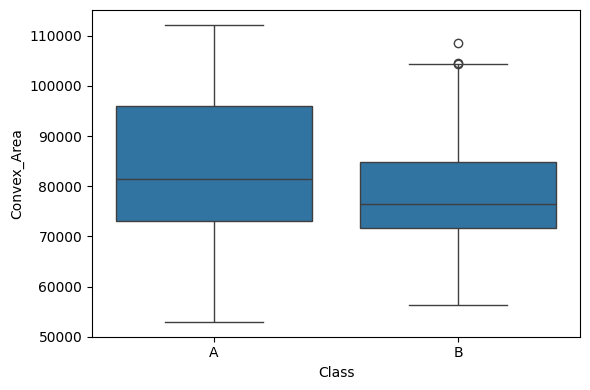

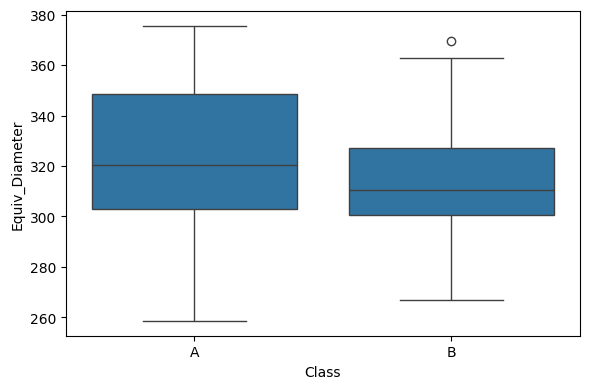

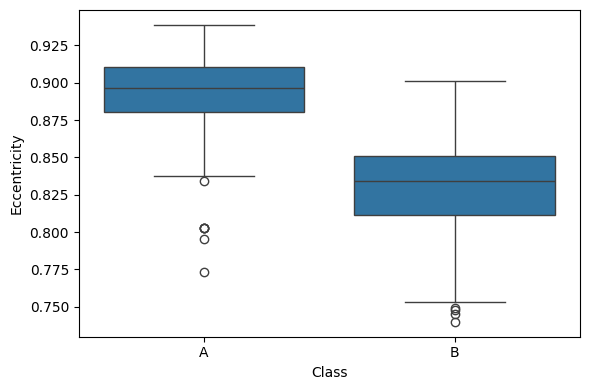

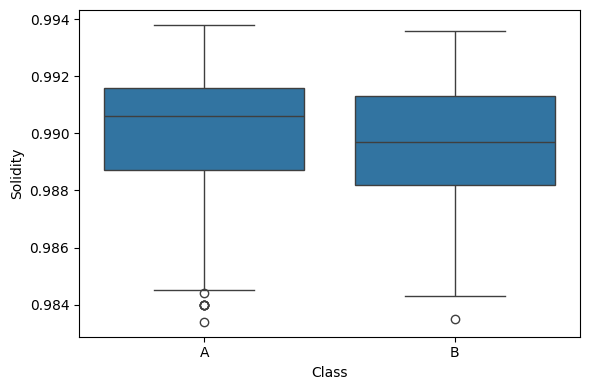

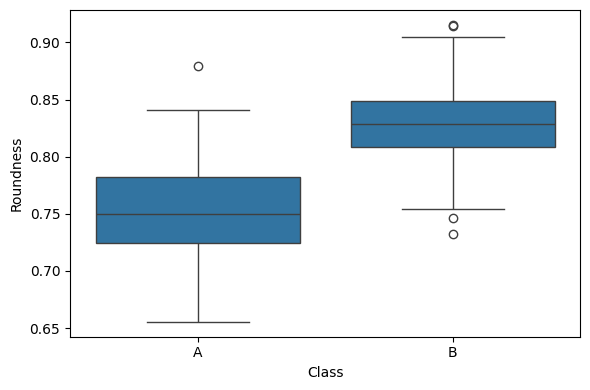

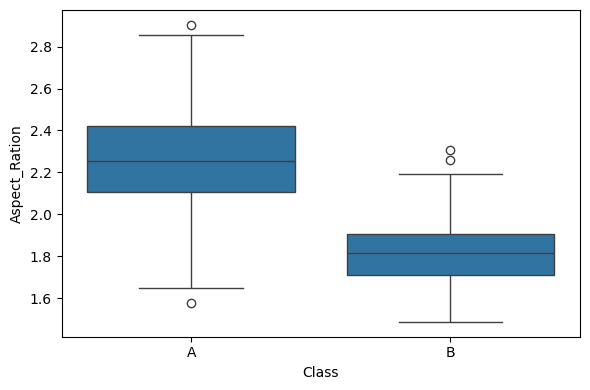

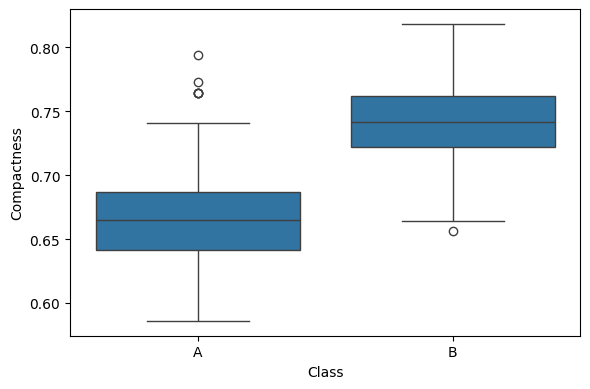

In [ ]:
# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=category_col, y=col, data=train_df)
    plt.tight_layout()
    plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=category_col, y=col, data=df_clean)
    plt.tight_layout()
    plt.show()


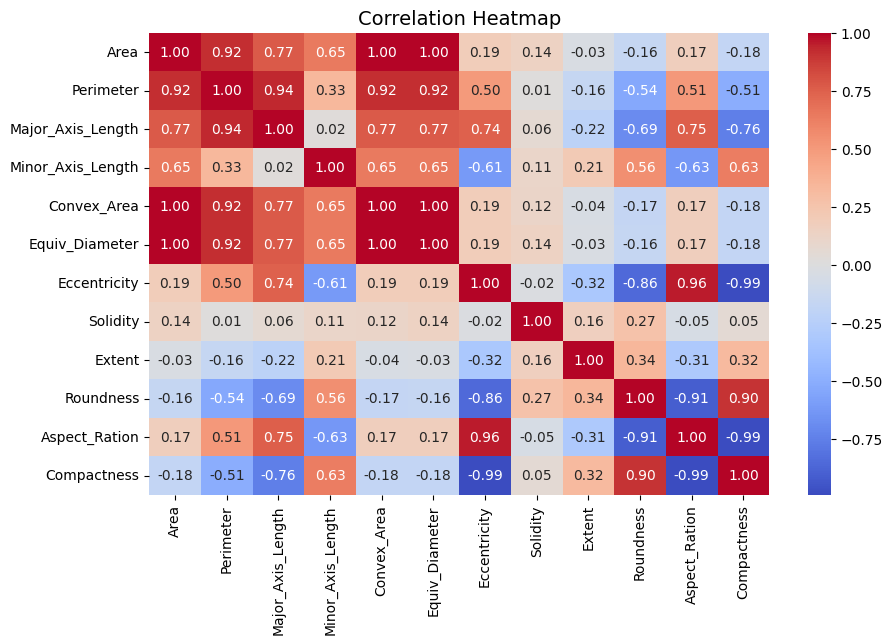

In [ ]:
corr=train_df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [ ]:
# sns.pairplot(train_df,vars = ['Area','Perimeter','Major_Axis_Length','Minor_Axis_Length','Convex_Area','Equiv_Diameter',
#                 'Eccentricity','Solidity','Roundness','Aspect_Ration','Compactness'],hue='Class', diag_kind='kde', palette='coolwarm')
# plt.suptitle("Pairplot of Features w.r.t. Target (Class)", y=1.02, fontsize=14)
# plt.show()

In [ ]:
X = train_df.drop('Class', axis=1)
y = train_df['Class']


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.8333333333333334
F1 Score: 0.8326797385620914
Confusion Matrix:
 [[37 11]
 [ 5 43]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    oob_score=True,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, oob_score=True, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_val)
print("RF Accuracy:", accuracy_score(y_val, y_pred_rf))
print("RF Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))

RF Accuracy: 0.8958333333333334
RF Confusion Matrix:
 [[44  4]
 [ 6 42]]


In [ ]:
# ------------------ TEST SET ------------------
# test_df.columns = test_df.columns.astype(str)

# # 2. Strip whitespace + tabs + newlines
# test_df.columns = test_df.columns.str.strip()

# # 3. Normalize case (optional but safe)
# test_df.columns = test_df.columns.str.lower()
# #if 'id' in test_df.columns:
# test_ids = test_df['id']
# test_df.drop(['id'], axis=1, inplace=True)

test_df.columns = test_df.columns.astype(str).str.strip().str.lower()

if 'id' in test_df.columns:
    test_ids = test_df['id']
    test_df = test_df.drop(columns='id')
else:
    test_ids = test_df.index

In [ ]:
# Encode categorical columns in test
test_df = pd.get_dummies(test_df, columns=cat_cols, drop_first=True, dtype=int)

# Align test columns with train
test_df = test_df.reindex(columns=X.columns, fill_value=0)

In [ ]:
#probs = rf.predict_proba(test_df)
probs = rf.predict(test_df)   #yahi galat hua tha

# Map back class names: C, CL, D
# class_names = le.inverse_transform()
# le = LabelEncoder()
# train_df['Class'] = le.fit_transform(train_df['Class'])   # C,CL,D → 0,1,2

In [ ]:
#for multi
probs = model.predict_proba(X_test)

submission = pd.DataFrame(
    probs,
    columns=["c", "cl", "d"]
)

submission.insert(0, "id", test_ids)
submission.to_csv("submission.csv", index=False)

In [ ]:
submission = pd.DataFrame({
    'id': test_ids,
    'Class': probs,

})

In [ ]:
submission.to_csv('submission.csv', index=False)
print("Submission saved successfully!")

Submission saved successfully!


In [ ]:
print(submission)

      id Class
0      1     B
1      2     B
2      3     B
3      4     B
4      5     B
..   ...   ...
745  746     B
746  747     B
747  748     B
748  749     B
749  750     B

[750 rows x 2 columns]
